# Predict Bike Sharing Demand with AutoGluon Template

## [Project: Predict Bike Sharing Demand with AutoGluon](https://www.kaggle.com/competitions/bike-sharing-demand/overview)

__NOTE: THE FOLLOWING NOTEBOOK WAS RUN USING GOOGLE COLAB SINCE I EXHAUSTED MY SAGEMAKER CREDIT__

This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

2. Scroll down to API and click Create New API Token.

3. Open up `kaggle.json` and use the username and key.


## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=a092c353366871850e1f40d097ca88944c85c0eae50bb7be5a6a697f29e1393f
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "isaakmwangi"
kaggle_key = "9e237459ba51babdbcaff2d7cbb19f77"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [3]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

100% 189k/189k [00:00<00:00, 433kB/s]
100% 189k/189k [00:00<00:00, 432kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [5]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
# Dropping casual and registered columns as they are also not present in the test dataset.
columns_to_drop = ['casual', 'registered']
train.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [13]:
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
      train_data=train,
      time_limit=600,
      presets="best_quality"

)

No path specified. Models will be saved in: "AutogluonModels/ag-20230522_091305/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230522_091305/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [14]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.002111      19.484756  517.262285                0.000852           0.334598            3       True         14
1   RandomForestMSE_BAG_L2  -53.329024      14.802941  424.205455                0.577410          33.698502            2       True         12
2          LightGBM_BAG_L2  -54.891994      14.666224  423.176142                0.440693          32.669188            2       True         11
3          CatBoost_BAG_L2  -56.319441      14.337330  433.829562                0.111799          43.322609            2       True         13
4        LightGBMXT_BAG_L2  -60.267818      18.465801  450.559997                4.240270          60.053044            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.095406    0.050618         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

<Axes: xlabel='model'>

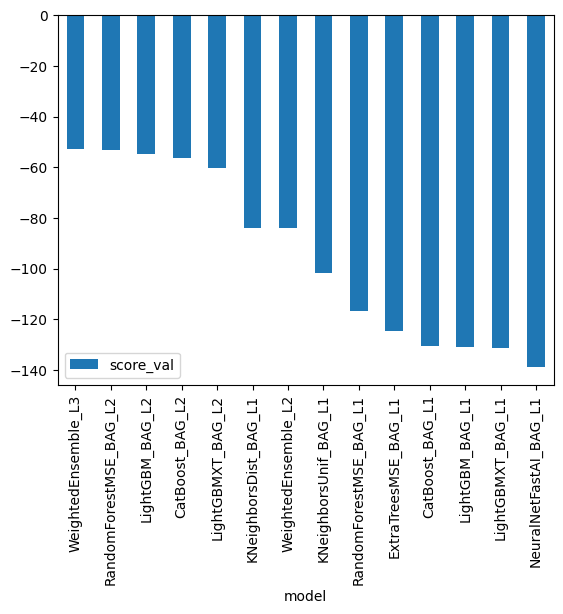

In [18]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
#From the above diagram model "WeightedEnsemble_L3" has the lowest score_val value of -53.002111

### Create predictions from test dataset

In [19]:
predictions = predictor.predict(test)
predictions.head()

0    23.177317
1    43.523373
2    46.761108
3    49.352135
4    51.722439
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [20]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.404861
std        89.758766
min         3.297481
25%        19.340611
50%        64.052361
75%       166.806229
max       364.501892
Name: count, dtype: float64

In [21]:
# How many negative values do we have?
any_negative = (predictions < 0).any()
print("Are there any negative values in predictions? ", any_negative)

Are there any negative values in predictions?  False


In [22]:
# Set them to zero
# If there's any negative values we can uncomment and run the below cell

#predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [24]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,23.177317
1,2011-01-20 01:00:00,43.523373
2,2011-01-20 02:00:00,46.761108
3,2011-01-20 03:00:00,49.352135
4,2011-01-20 04:00:00,51.722439


In [25]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "new first raw submission"

100% 188k/188k [00:02<00:00, 67.5kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-05-22 09:50:38  new first raw submission           complete  1.80198      1.80198       
submission_new_hpo.csv       2023-05-17 17:08:05  new features with hyperparameters  complete  1.35743      1.35743       
submission_new_features.csv  2023-05-17 15:28:33  new features                       complete  1.81998      1.81998       
submission.csv               2023-05-17 13:12:16  first raw submission               complete  1.79366      1.79366       


#### Initial score of `1.80198`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

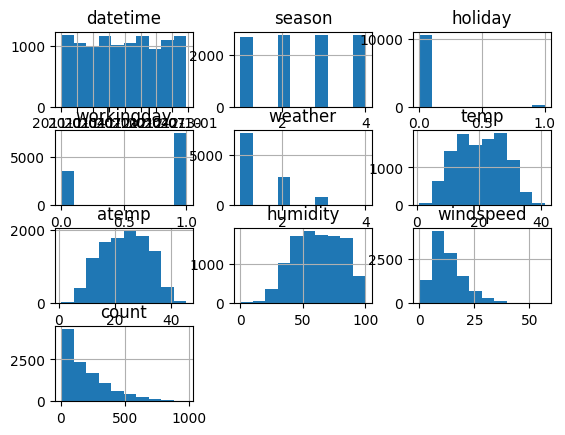

In [28]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist();

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [30]:
# create a new feature

# Extract year, month, and day as separate features
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day




test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day

In [31]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [32]:
train["season"] = train['season'].astype("category")
train["weather"] = train['weather'].astype("category")
test["season"] = train['season'].astype("category")
test["weather"] = train['season'].astype("category")

In [36]:
# Extract time-based features
train['hour_of_day'] = train['datetime'].dt.hour

test['hour_of_day'] = test['datetime'].dt.hour


In [41]:
# View are new feature
train.head(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,2011,1,1,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,3,2011,1,1,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,8,2011,1,1,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,14,2011,1,1,9


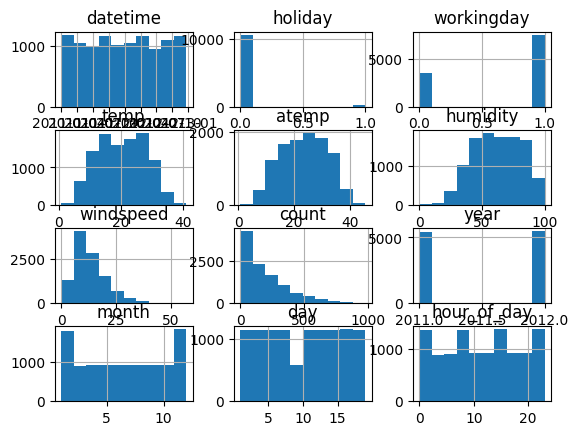

In [39]:
# View histogram of all features again now with the hour feature
train.hist();

In [40]:
train.corr()

<ipython-input-40-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,day,hour_of_day
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,0.002780
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,0.146631
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.400601
year,0.012021,-0.002482,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.004234
month,0.001731,-0.003394,0.257589,0.264173,0.204537,-0.150192,0.166862,-0.004932,1.000000,0.001974,-0.006818
day,-0.015877,0.009829,0.015551,0.011866,-0.011335,0.036157,0.019826,0.001800,0.001974,1.000000,0.001132


In [42]:
# Drop the original 'datetime' column since it's now not much needed
train.drop('datetime', axis=1, inplace=True)
test.drop('datetime', axis=1, inplace=True)


# Drop the 'atemp' column since it's highly correlated with 'temp' column
train.drop('atemp', axis=1, inplace=True)
test.drop('atemp', axis=1, inplace=True)

In [43]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour_of_day
0,1,0,0,1,9.84,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,75,0.0,1,2011,1,1,4


In [44]:
test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour_of_day
0,1,0,1,1,10.66,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,56,11.0014,2011,1,20,4


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       10886 non-null  category
 1   holiday      10886 non-null  int64   
 2   workingday   10886 non-null  int64   
 3   weather      10886 non-null  category
 4   temp         10886 non-null  float64 
 5   humidity     10886 non-null  int64   
 6   windspeed    10886 non-null  float64 
 7   count        10886 non-null  int64   
 8   year         10886 non-null  int64   
 9   month        10886 non-null  int64   
 10  day          10886 non-null  int64   
 11  hour_of_day  10886 non-null  int64   
dtypes: category(2), float64(2), int64(8)
memory usage: 872.3 KB


## Step 5: Rerun the model with the same settings as before, just with more features

In [48]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
      train_data=train,
      time_limit=600,
      presets="best_quality"

)

No path specified. Models will be saved in: "AutogluonModels/ag-20230522_103411/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230522_103411/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [49]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.859004      23.408050  533.082215                0.000999           0.453538            3       True         15
1      WeightedEnsemble_L2  -36.073280      20.726552  359.503322                0.000880           0.401679            2       True          9
2     ExtraTreesMSE_BAG_L2  -36.095914      22.454529  415.101953                0.752593          11.751867            2       True         14
3          CatBoost_BAG_L2  -36.221864      21.803940  464.256348                0.102004          60.906262            2       True         13
4          LightGBM_BAG_L2  -36.491328      21.825718  428.651909                0.123782          25.301823            2       True         11
5   RandomForestMSE_BAG_L2  -36.563787      22.428673  434.668725         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -122.85654908089322,
  'KNeighborsDist_BAG_L1': -118.59789000570196,
  'LightGBMXT_BAG_L1': -37.231570691243626,
  'LightGBM_BAG_L1': 

In [50]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    13.994121
1     6.009462
2     4.871237
3     4.064766
4     3.998393
Name: count, dtype: float32

In [51]:
# Remember to set all negative values to zero
any_negative = (predictions_new_features < 0).any()
print("Are there any negative values in predictions? ", any_negative)

Are there any negative values in predictions?  False


In [54]:
# Same submitting predictions
submission_new_features= submission
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [55]:
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,13.994121
1,2011-01-20 01:00:00,6.009462
2,2011-01-20 02:00:00,4.871237
3,2011-01-20 03:00:00,4.064766
4,2011-01-20 04:00:00,3.998393


In [57]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "latest new features"

100% 188k/188k [00:01<00:00, 97.2kB/s]
Successfully submitted to Bike Sharing Demand

In [58]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-22 10:57:19  latest new features                complete  0.49191      0.49191       
submission.csv               2023-05-22 09:50:38  new first raw submission           complete  1.80198      1.80198       
submission_new_hpo.csv       2023-05-17 17:08:05  new features with hyperparameters  complete  1.35743      1.35743       
submission_new_features.csv  2023-05-17 15:28:33  new features                       complete  1.81998      1.81998       


#### New Score of `0.49191`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [67]:
#from autogluon.tabular import RMSLEMetric

hyperparameters = {
    'NN': {'num_epochs': 10},
    'GBM': {'num_boost_round': 100, 'learning_rate': 0.01},
    'CAT': {'iterations': 50, 'learning_rate': 0.05},
    'RF': {'n_estimators': 100, 'max_depth': 6},
}

# Create and fit the predictor with hyperparameter optimization
predictor_new_hpo = TabularPredictor(label='count', eval_metric="root_mean_squared_error")


predictor_new_hpo.fit(train, 
                      hyperparameters=hyperparameters,
                      time_limit=900,
                      presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230522_113509/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20230522_113509/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [68]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForest_BAG_L2 -51.104270       2.742071  447.153092                0.146082           1.782169            2       True          6
1  WeightedEnsemble_L3 -51.104270       2.742871  447.451473                0.000800           0.298381            3       True          8
2      CatBoost_BAG_L2 -58.165713       3.184165  559.668632                0.588176         114.297709            2       True          7
3      CatBoost_BAG_L1 -75.856304       0.524792  201.284266                0.524792         201.284266            1       True          3
4  WeightedEnsemble_L2 -75.856304       0.525429  201.482488                0.000637           0.198223            2       True          4
5      LightGBM_BAG_L2 -82.314400       3.629452  583.209168                1.033463         137.838244 

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -96.33590504659033,
  'RandomForest_BAG_L1': -97.1445067449418,
  'CatBoost_BAG_L1': -75.8563042217426,
  'WeightedEnsemble_L2': -75.8563042217426,
  'LightGBM_BAG_L2': -82.31439968715478,
  'RandomForest_BAG_L2': -51.10426981697677,
  'CatBoost_BAG_L2': -58.16571277327079,
  'WeightedEnsemble_L3': -51.10426981697677},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': 'AutogluonModels/ag-20230522_113509/models/LightGBM_BAG_L1/',
  'RandomForest_BAG_L1': 'AutogluonModels/ag-20230522_113509/models/RandomF

In [69]:
predictor_new_hpo = predictor_new_hpo.predict(test)
predictor_new_hpo.head()

0    12.324529
1     6.525270
2     5.045537
3     5.045537
4     5.045537
Name: count, dtype: float32

In [70]:
# Remember to set all negative values to zero
any_negative = (predictor_new_hpo < 0).any()
print("Are there any negative values in predictions? ", any_negative)

Are there any negative values in predictions?  False


In [71]:
# Same submitting predictions
submission_new_hpo = submission
submission_new_hpo["count"] = predictor_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [72]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "Latest new features with hyperparameters"

100% 188k/188k [00:03<00:00, 52.2kB/s]
Successfully submitted to Bike Sharing Demand

In [73]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                               status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-22 12:04:35  Latest new features with hyperparameters  complete  0.54046      0.54046       
submission_new_features.csv  2023-05-22 10:57:19  latest new features                       complete  0.49191      0.49191       
submission.csv               2023-05-22 09:50:38  new first raw submission                  complete  1.80198      1.80198       
submission_new_hpo.csv       2023-05-17 17:08:05  new features with hyperparameters         complete  1.35743      1.35743       


#### New Score of `0.54046`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

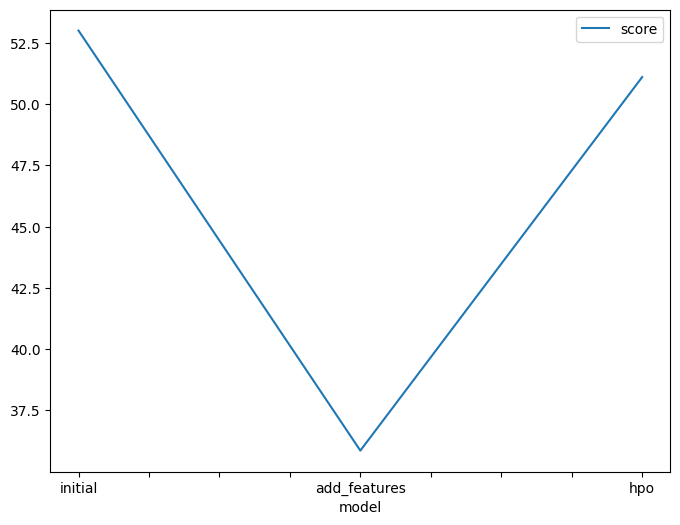

In [75]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [53.002111, 35.859004, 51.104270]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')



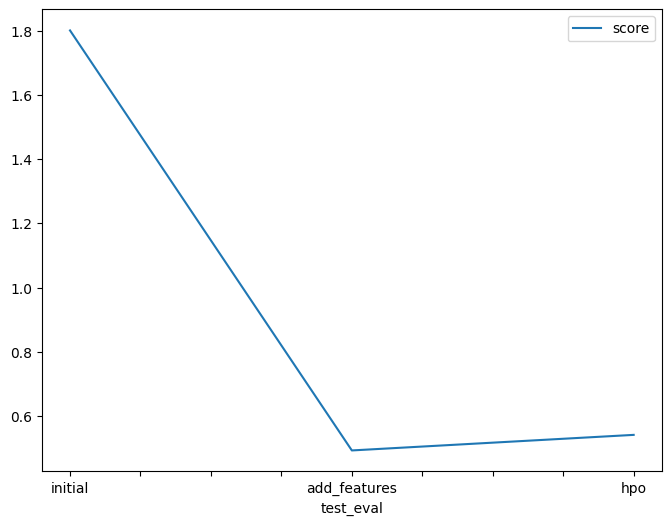

In [76]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80198, 0.49191, 0.54046]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [78]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["Default", "Default", "'NN': {'num_epochs': 10"],
    "hpo2": ["Default", "Default", "'GBM': {'num_boost_round': 100, 'learning_rate': 0.01}"],
    "hpo3": ["Default", "Default", "'CAT': {'iterations': 50, 'learning_rate': 0.05}"],
    "score": [1.80198, 0.49191, 0.54046]
})


,model,hpo1,hpo2,hpo3,score
0,initial,Default,Default,Default,1.80198
1,add_features,Default,Default,Default,0.49191
2,hpo,'NN': {'num_epochs': 10,"'GBM': {'num_boost_round': 100, 'learning_rate': 0.01}","'CAT': {'iterations': 50, 'learning_rate': 0.05}",0.54046
